In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ref_file = r'testcase_input/forcing/Kenttarova_forcing_era5.csv'
forc_file = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\KENTTAROVA\METEO_KENTTAROVA_final.csv'

In [3]:
ref = pd.read_csv(ref_file, sep=';', index_col=0, parse_dates=True)
forc = pd.read_csv(forc_file, sep=';', index_col=0, parse_dates=True)

In [4]:
forc.columns

Index(['NEB', 'NEB_flag', 'PSurf', 'PSurf_flag', 'HUMREL', 'HUMREL_flag',
       'Prec_int_flag', 'Tair', 'Tair_flag', 't_dewpoint', 't_dewpoint_flag',
       'Wind_DIR', 'Wind_DIR_flag', 'Wind', 'Wind_flag', 'DIR_SWdown',
       'DIR_SWdown_flag', 'LWdown', 'LWdown_flag', 'Rainf_flag', 'Snowf_flag',
       'Snowf', 'Rainf'],
      dtype='object')

In [5]:
ref.columns

Index(['UTC', 'ID', 'cloudiness', 'hpa', 'rh', 'rainfall', 'snowdepth',
       't_mean', 't_min', 't_max', 't_dewpoint', 'visibility',
       'wind_direction', 'gust_speed', 'wind_speed', 'lamposumma_v',
       'radiation'],
      dtype='object')

In [6]:
forc['DIR_SWdown']['2021-07-03':] = np.nan

In [7]:
# hourly dataframe
new_forc = pd.DataFrame(index=pd.date_range(ref.index[0], ref.index[-1], freq='H'))
new_forc['UTC'] = 0
new_forc['ID'] = 1

new_forc['cloudiness'] = forc['NEB']*9
new_forc['cloudiness'] = new_forc['cloudiness'].fillna(ref['cloudiness'])

new_forc['hpa'] = forc['PSurf']*1e-2
new_forc['hpa'] = new_forc['hpa'].fillna(ref['hpa'])

new_forc['rh'] = forc['HUMREL']
new_forc['rh'] = new_forc['rh'].fillna(ref['rh'])

new_forc['rainfall'] = (forc['Rainf'] + forc['Snowf']) * 60 * 60 # per second to per hour
new_forc['rainfall'] = new_forc['rainfall'].fillna(ref['rainfall'])

new_forc['t_mean'] = forc['Tair'] - 273.15
#new_forc['t_mean'] = new_forc['t_mean'].fillna(ref['t_mean'])

new_forc['t_dewpoint'] = forc['t_dewpoint']
new_forc['t_dewpoint'] = new_forc['t_dewpoint'].fillna(ref['t_dewpoint'])

new_forc['wind_speed'] = forc['Wind']
new_forc['wind_speed'] = new_forc['wind_speed'].fillna(ref['wind_speed'])

new_forc['wind_direction'] = forc['Wind_DIR']
new_forc['wind_direction'] = new_forc['wind_direction'].fillna(ref['wind_direction'])

new_forc['snowdepth'] = ref['snowdepth']

new_forc['radiation'] = forc['DIR_SWdown']
new_forc['radiation'] = new_forc['radiation'].fillna(ref['radiation'])

In [8]:
# to daily dataframe
new_forc_d =  pd.DataFrame(index=pd.date_range(ref.index[0], ref.index[-1], freq='D'))

for col in new_forc.columns:
    if col != 'rainfall':
        new_forc_d[col] = new_forc[col].resample('D').mean()
    elif col == 'rainfall':
        new_forc_d[col] = new_forc[col].resample('D').sum()
        
new_forc_d['t_min'] = ref['t_min']
new_forc_d['t_max'] = ref['t_max']
new_forc_d['t_mean'] = new_forc_d['t_mean'].fillna(ref['t_mean'])

In [9]:
new_forc_d['lamposumma_v'] = 0.0
temp_year = 0

for i in range(len(new_forc_d)):
    if temp_year != (new_forc_d.index.year[i]):
        temp_year = new_forc_d.index.year[i]
        lamposumma = 0.0
    if new_forc_d['t_mean'][i] > 5:
        lamposumma = lamposumma + new_forc_d['t_mean'][i] - 5
    new_forc_d['lamposumma_v'][i] = lamposumma

<Axes: xlabel='time'>

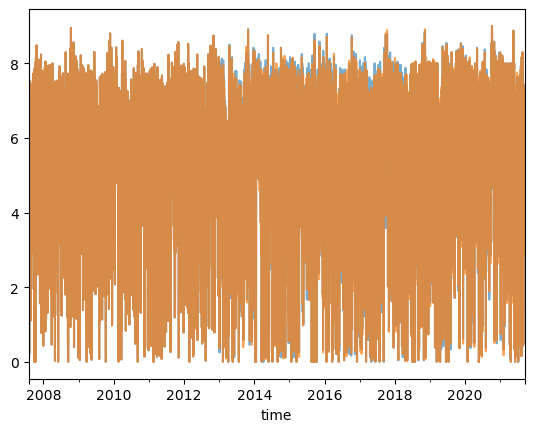

In [10]:
new_forc_d['cloudiness'].plot(alpha=0.6); 
ref['cloudiness'].plot(alpha=0.7)

<Axes: xlabel='time'>

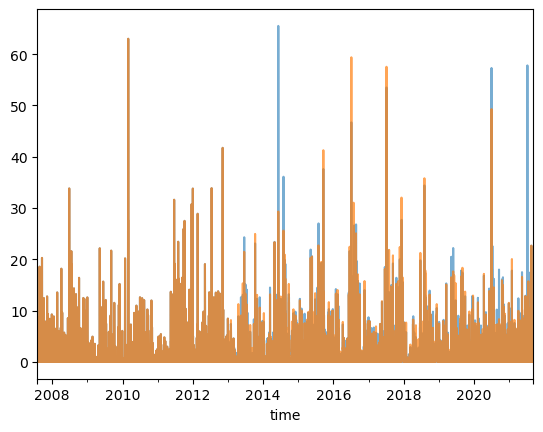

In [11]:
new_forc_d['rainfall'].plot(alpha=0.6); 
ref['rainfall'].plot(alpha=0.7)

<Axes: xlabel='time'>

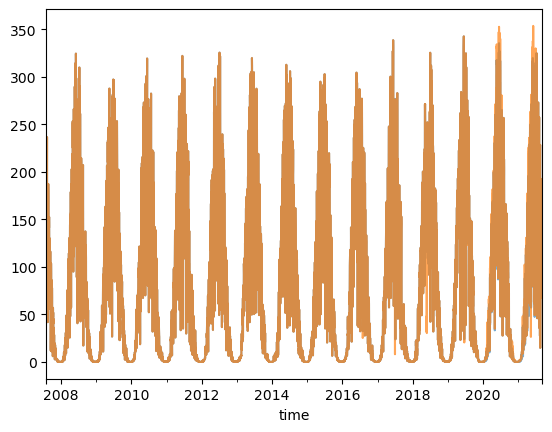

In [12]:
new_forc_d['radiation'].plot(alpha=0.6); 
ref['radiation'].plot(alpha=0.7)

<Axes: xlabel='time'>

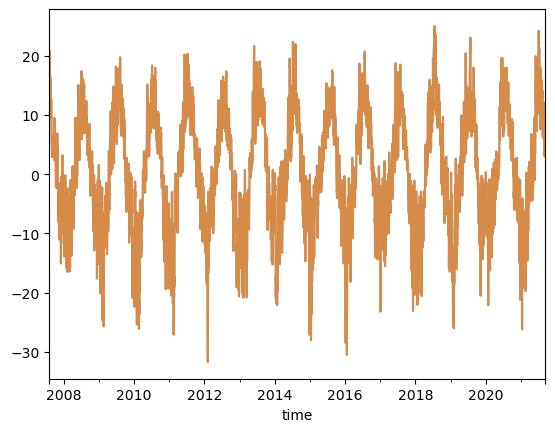

In [13]:
new_forc_d['t_mean'].plot(alpha=0.6); 
ref['t_mean'].plot(alpha=0.7)

<Axes: xlabel='time'>

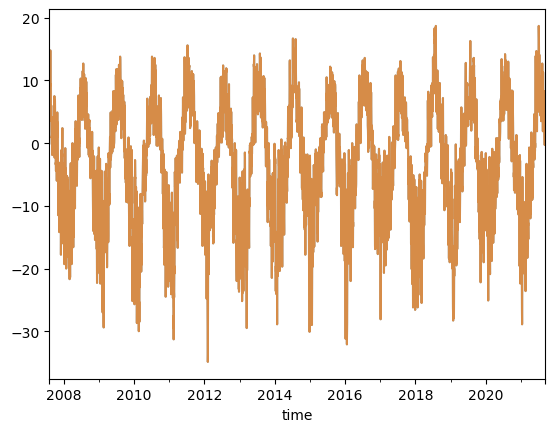

In [14]:
new_forc_d['t_min'].plot(alpha=0.6); 
ref['t_min'].plot(alpha=0.7)

<Axes: xlabel='time'>

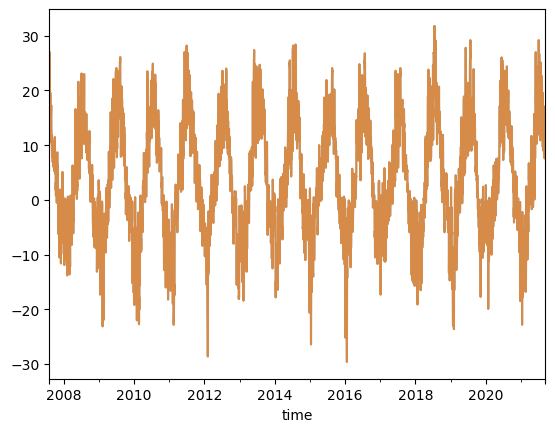

In [15]:
new_forc_d['t_max'].plot(alpha=0.6); 
ref['t_max'].plot(alpha=0.7)

<Axes: xlabel='time'>

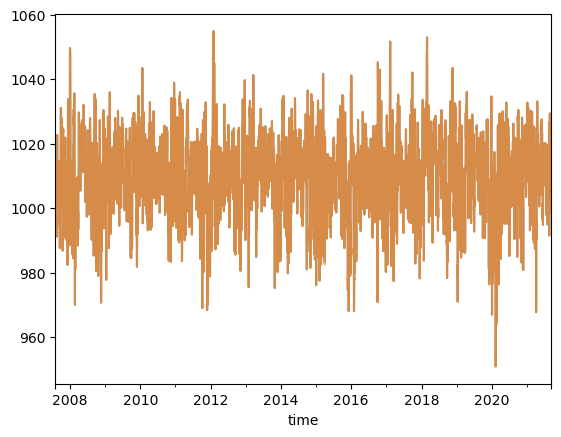

In [16]:
new_forc_d['hpa'].plot(alpha=0.6); 
ref['hpa'].plot(alpha=0.7)

<Axes: xlabel='time'>

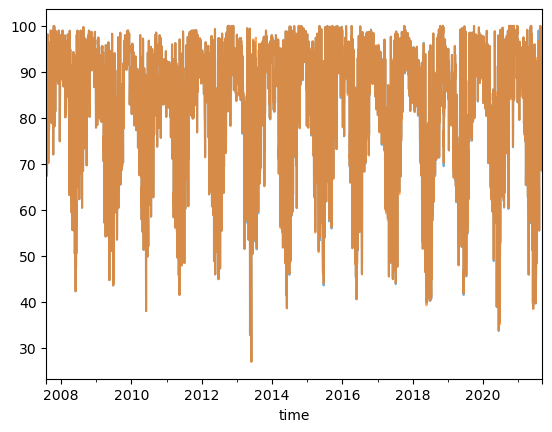

In [17]:
new_forc_d['rh'].plot(alpha=0.6); 
ref['rh'].plot(alpha=0.7)

<Axes: xlabel='time'>

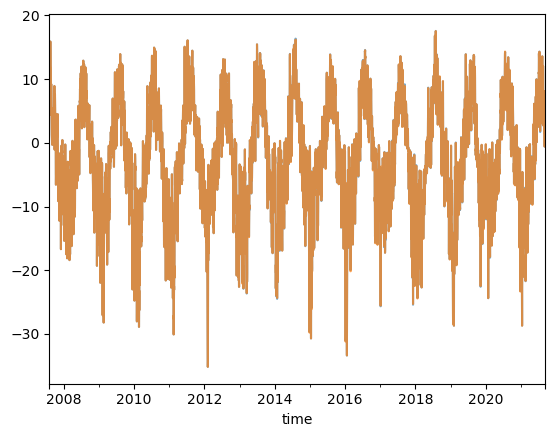

In [18]:
new_forc_d['t_dewpoint'].plot(alpha=0.6); 
ref['t_dewpoint'].plot(alpha=0.7)

<Axes: xlabel='time'>

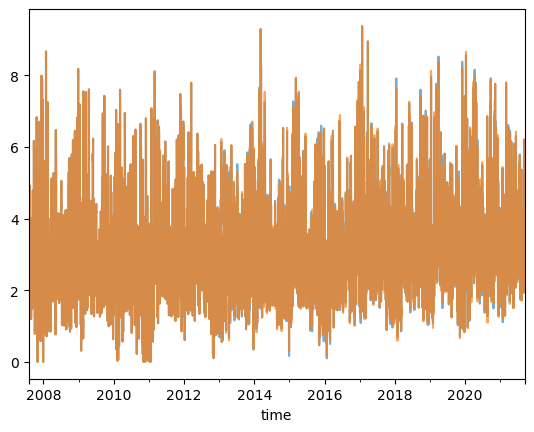

In [19]:
new_forc_d['wind_speed'].plot(alpha=0.6); 
ref['wind_speed'].plot(alpha=0.7)

<Axes: xlabel='time'>

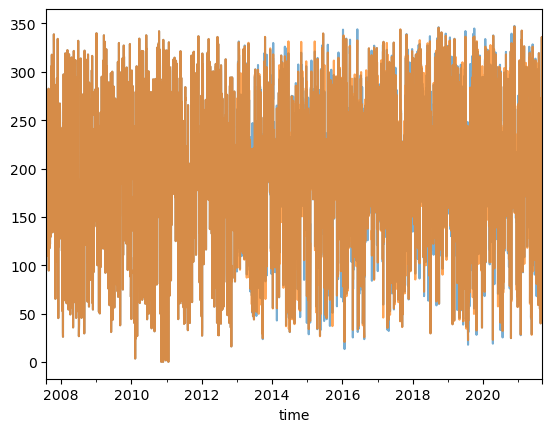

In [20]:
new_forc_d['wind_direction'].plot(alpha=0.6); 
ref['wind_direction'].plot(alpha=0.7)

<Axes: xlabel='time'>

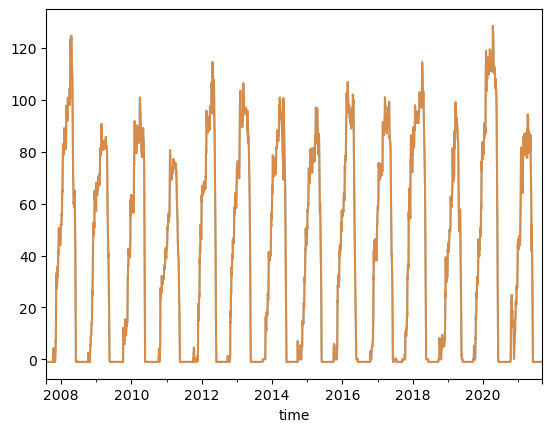

In [21]:
new_forc_d['snowdepth'].plot(alpha=0.6); 
ref['snowdepth'].plot(alpha=0.7)

<Axes: xlabel='time'>

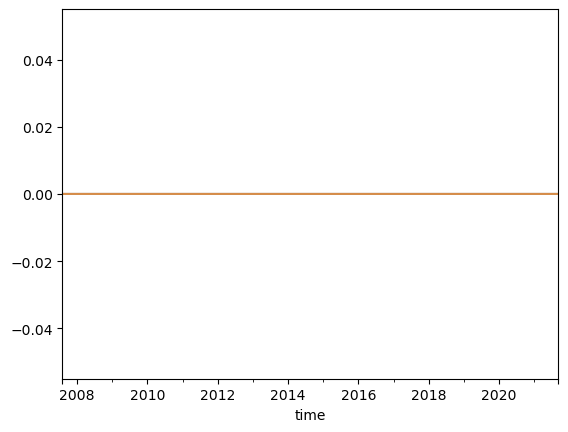

In [22]:
new_forc_d['UTC'].plot(alpha=0.6); 
ref['UTC'].plot(alpha=0.7)

<Axes: xlabel='time'>

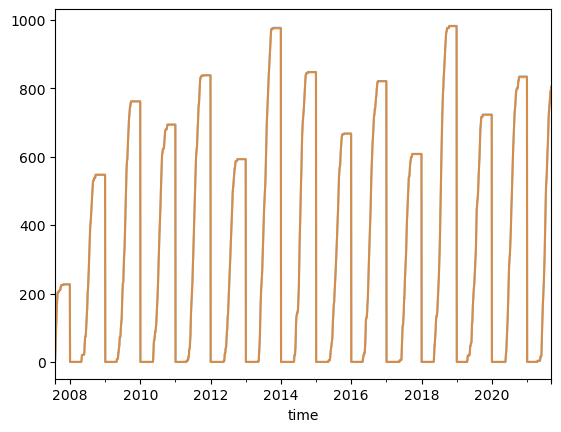

In [23]:
new_forc_d['lamposumma_v'].plot(alpha=0.6); 
ref['lamposumma_v'].plot(alpha=0.7)

In [11]:
new_forc_d.index.name = 'time'

In [12]:
new_forc_d.to_csv(r'C:\SpaFHy_v1_Pallas_2D\testcase_input\forcing\FORCING_KENTTAROVA_final.csv', sep = ';', index=True)